## Linear Support Vector Machines
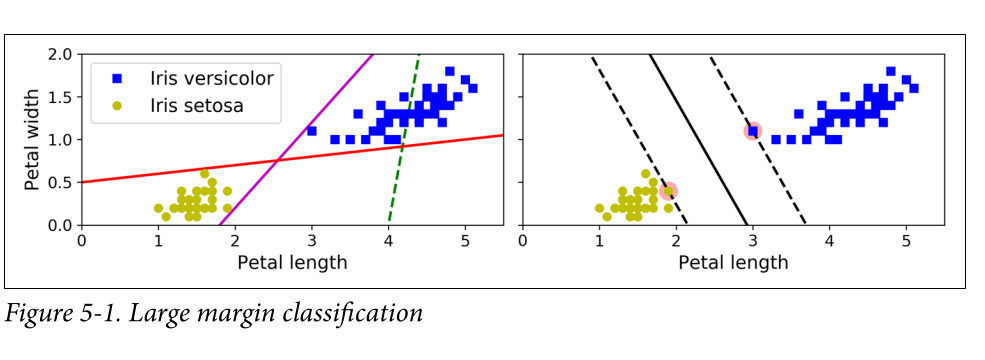

The figure on the left shows a few possible decision boundaries determined by linear classifiers, while the figure on the right shows the decision boundary of a SVM. The straight line in the middle is the decision boundary of the SVM, while the dashed lines are touching the support vectors (the two instances of both classes that are closest to the decision boundary) and are parallel to the decision boundary. The goal of the SVM is find a decision boundary such that the distance between the support vectors and the boundary is maximum.

__Notes:__ 
* Adding more instances in the middle of the two clusters will not affect the decision boundary since the decision boundary is only affected if there is a change to the support vectors. 
* Support Vector Machines are sensitive to unscaled data, so make sure to scale your data using something like the standard scaler!

If we require that the decision boundary separates the two clusters, then this is called a _hard marign classifier_. This kind of classifier is sensitive to outliers and might not even be possible to create as shown in the following figure:
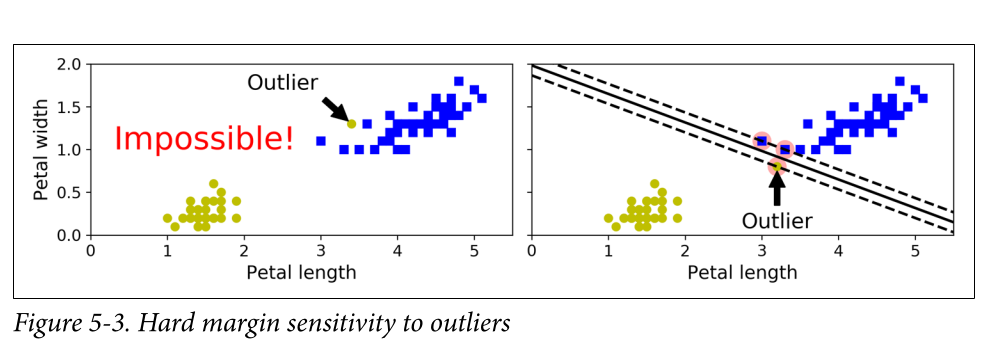

The solution to this problem is by using a more flexible model that is called a _soft margin classifier_. This classifier allows some instances to be between the decision boundary and the parallel dashed lines, or even be on the wrong side of the decision boundary. The goal here is to find balance between having a wide distance between support vectors, and having a small number of outliers allowed. 
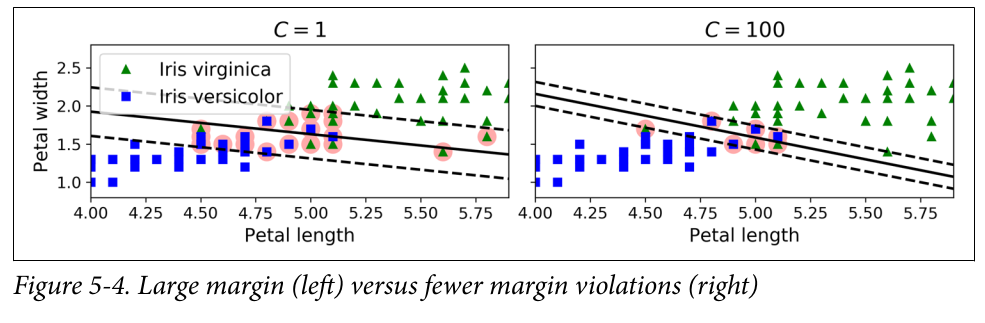

In [2]:
import numpy as np
from sklearn import datasets 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
iris = datasets.load_iris()
X = iris['data'][:, (2, 3)] #get the petal length, petal width
y = (iris['target'] == 2).astype(np.float64) #Iris virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C = 1, loss = 'hinge'))
])
svm_clf.fit(X, y)
svm_clf.predict([[5.5, 1.7]])

array([1.])

__Notes:__
* Instead of using LinearSVC, we could use SVC with a linear kernel (SVC(kernel = 'linear', C = 1)), or we could use the SGDClassifier class, with SGDClassifier(loss = 'hinge', alpha = 1/(m*C)). This last one can be useful in out of core learning when the training data cannot fit into memory.
* LinearSVC regularizes the bias term, so we should center the data by subtracting its mean. This is done automatically if we scale the data using the StandardScaler. Additionally, set the loss hyperparameter to 'hinge' since it is not the default, and set the dual hyperparameter to False, unless there are more features than training instances.

## Nonlinear Support Vector Machines

One approach to turn linear support vector machines into nonlinear ones is to add more features to the data, which could make the data linearaly separable. 

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [6]:
X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree = 3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C = 10, loss = 'hinge'))
])

polynomial_svm_clf.fit(X, y)


/home/thoalfeqar/miniconda3/envs/tf/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [7]:
axes = [-1.5, 2.5, -1, 1.5]
x0s = np.linspace(axes[0], axes[1], 100)
x1s = np.linspace(axes[2], axes[3], 100)
x0, x1 = np.meshgrid(x0s, x1s)
X = np.c_[x0.ravel(), x1.ravel()]

In [9]:
x0.shape

array([[-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       ...,
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ],
       [-1.5       , -1.45959596, -1.41919192, ...,  2.41919192,
         2.45959596,  2.5       ]])